# Ejercicio análisis time series

Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide:

1. Importa los datos 'df_furniture.csv' 
2. Trata la fecha como texto. Crea una columna para el año, mes y día, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Cargamos los datos

In [2]:
df = pd.read_csv("data/df_furniture.csv")
df.head()   

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [3]:
df.isnull().sum()

Month                       5
furniture_price_adjusted    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [5]:
# remove NaN values, and check data range

older_date = df['Month'].dropna().min()
newer_date = df['Month'].dropna().max()

In [6]:
print("Older date:",older_date, "\n" 
      "Newer date:",newer_date)    


Older date: 1992-01-01 
Newer date: 2019-07-01


In [7]:
# check nulls after dropna
df.isnull().sum().sum() > 0 


True

## 2. Tratar la fecha como texto y parsear

In [8]:
# Create a DatetimeIndex and assign it to 'Month'
df['Month'] = pd.date_range(older_date, newer_date, freq = 'MS')
# Converts the datatype of the Month to strings.
# Assign to a new column 'date_str'.
df['date_str'] = df['Month'].astype(str)


# Create new columns 'year','month', 'day'. Convert to integer  .astype(int)
df['year'] = df['date_str'].str[:4].astype(int)
df['month'] = df['date_str'].str[5:7].astype(int)
df['day'] = df['date_str'].str[8:].astype(int)

# New combined 'date' column with datetime datatype.
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
# New df copy with index set to 'date'
df_new = df.copy().set_index('date')
# Df with new index and only 1 column ('furniture_price_adjusted')
df = df.set_index('date')[['furniture_price_adjusted']]
df_new


,Month,furniture_price_adjusted,date_str,year,month,day
date,,,,,,
1992-01-01,1992-01-01,2073.432724,1992-01-01,1992,1,1
1992-02-01,1992-02-01,2114.485812,1992-02-01,1992,2,1
1992-03-01,1992-03-01,2260.570891,1992-03-01,1992,3,1
1992-04-01,1992-04-01,2255.103236,1992-04-01,1992,4,1
1992-05-01,1992-05-01,2331.414618,1992-05-01,1992,5,1
...,...,...,...,...,...,...
2019-03-01,2019-03-01,9718.107698,2019-03-01,2019,3,1
2019-04-01,2019-04-01,9248.814254,2019-04-01,2019,4,1
2019-05-01,2019-05-01,10001.305304,2019-05-01,2019,5,1


## 3. ¿De qué fecha a qué fecha va el histórico?

In [9]:
min_date = min(df.index)
max_date = max(df.index)
print(min_date, max_date)

1992-01-01 00:00:00 2019-07-01 00:00:00


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

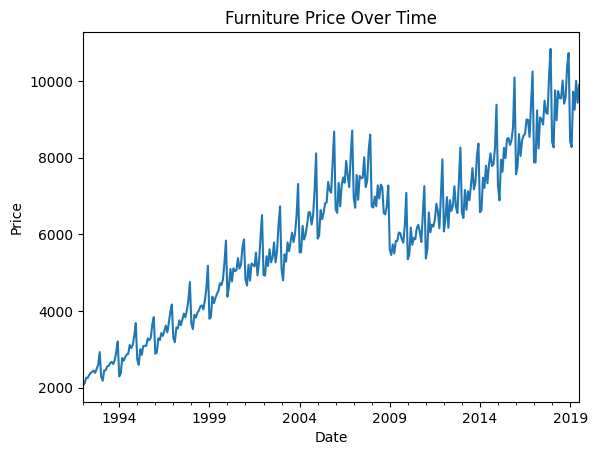

In [10]:
#  Plot the column 'furniture_price_adjusted'
df['furniture_price_adjusted'].plot()  

# labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Furniture Price Over Time')
plt.show()


**Trend:** It does appear to have an increasing trend over time. Prices are higher at the end of the period compared to the beginning.

**Seasonality**: No strong seasonality is visually apparent in the time series. Prices do not seem to have patterns that repeat yearly.

* It is a long-term monthly time series, with an increasing trend in furniture prices, but no strong visible seasonality. 

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

* 'ADF Test Statistic:', result[0] 
* 'p-value:', result[1]
* 'Number of Lags:', result[2]
* 'Number of Observations Used for ADF Regression:', result[3]
* 'Critical Value 1%:', result[4]['1%']
* 'Critical Value 5%:', result[4]['5%'] 
* 'Critical Value 10%:', result[4]['10%']






In [11]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(df['furniture_price_adjusted'].values, autolag = 'AIC')


print('AD_Fuller Method:', result[1])
print('ADF Test Statistic:', result[0]) 
print('p-value:', result[1])
print('Number of Lags:', result[2])
print('Number of Observations Used for ADF Regression:', result[3])
print('Critical Value 1%:', result[4]['1%'])
print('Critical Value 5%:', result[4]['5%']) 
print('Critical Value 10%:', result[4]['10%'])





AD_Fuller Method: 0.7035529748090005
ADF Test Statistic: -1.128550725873689
p-value: 0.7035529748090005
Number of Lags: 14
Number of Observations Used for ADF Regression: 316
Critical Value 1%: -3.4512146067362317
Critical Value 5%: -2.870730188960711
Critical Value 10%: -2.5716664849383113


*  **p-value of 0.7036** series is likely non-stationary.

* The p-value is much higher than the common significance levels of 0.01, 0.05 or 0.1. This means the test statistic does not provide strong evidence against the null hypothesis of a unit root (non-stationarity).

* The test statistic of -1.1286 is lower (in absolute value) than even the 10% critical value of -2.5717. For stationarity, we would expect the test statistic to be more negative and lower than the critical values.

* With a high p-value and test statistic that is not sufficiently negative, we do not have statistical evidence to reject the null hypothesis and conclude the series is likely non-stationary.

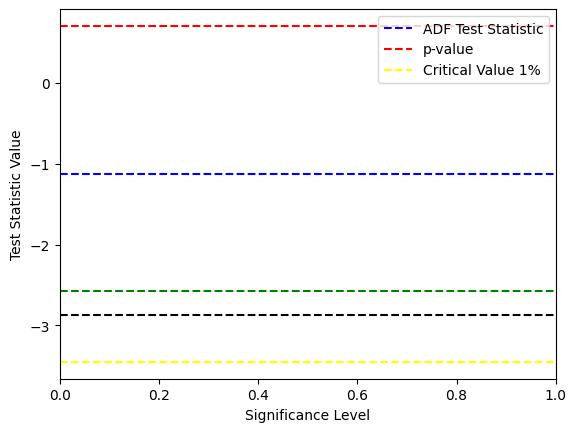

In [12]:
import matplotlib.pyplot as plt

# ADF test results
adf_value = result[0] 
pvalue = result[1]
lags = result[2]
nobs = result[3]
crit_vals = result[4]

# Plot ADF test statistic
plt.axhline(adf_value, color='blue', linestyle='--', label='ADF Test Statistic')

# Plot p-value
plt.axhline(pvalue, color='red', linestyle='--', label='p-value') 

# Plot critical values 
plt.axhline(crit_vals['1%'], color='yellow', linestyle='--', label='Critical Value 1%')
plt.axhline(crit_vals['5%'], color='black', linestyle='--')
plt.axhline(crit_vals['10%'], color='green', linestyle='--')

# labels and show plot
plt.xlabel('Significance Level')
plt.ylabel('Test Statistic Value')
plt.legend()

plt.show()


* The KPSS test has the null hypothesis that the series is stationary. So if the p-value is below a significance level (e.g. 0.05), It would reject the null and conclude the series is likely non-stationary.

* We can compare the test statistic to the critical values to determine if we can reject the null. The key things to check are similar to the ADF test.

* This provides a statistical test for stationarity complementary to the ADF test. 




In [13]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(df['furniture_price_adjusted'], regression='c')

print('KPSS Statistic:', kpss_test[0])
print('p-value:', kpss_test[1])
print('Lags:', kpss_test[2])
print('Critical Value 1%:', kpss_test[3]['1%']) 
print('Critical Value 5%:', kpss_test[3]['5%'])
print('Critical Value 10%:', kpss_test[3]['10%'])





KPSS Statistic: 2.555246987562725
p-value: 0.01
Lags: 11
Critical Value 1%: 0.739
Critical Value 5%: 0.463
Critical Value 10%: 0.347


/var/folders/m8/hp9mxxbj6dv9x3px18fy22_r0000gn/T/ipykernel_8239/4159544717.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df['furniture_price_adjusted'], regression='c')


## 6. ¿Conoces algún método para representar mejor la tendencia?

m, b = np.polyfit(yearly_means.index, yearly_means.values, 1)

* This is a useful method to quantify and visualize the upward or downward trend in a time series using linear regression. The slope and intercept parameters summarize the trend concisely.

* Fitting a simple linear regression model to the yearly mean prices and plotting the regression line on top of the yearly average price plot.

*  By passing 1 as the second argument, we fit a polynomial of degree 1, which is a linear model.

* yearly_means.index =  the x-values (the years)

* yearly_means.values = y-values (the mean prices for each year)

* m, b = np.polyfit(...) returns the slope (m) and intercept (b) of the fitted linear model


* The slope m quantifies the rate of increase in prices over time. The line visualizes the overall linear trend in the data.



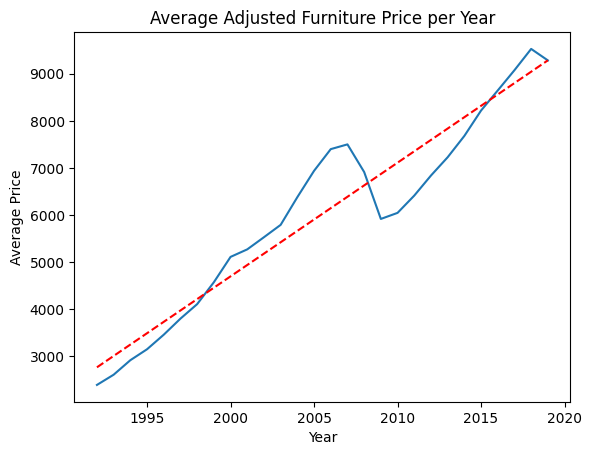

In [14]:
# Calculate mean price per year
yearly_means = df_new.groupby('year')['furniture_price_adjusted'].mean()

# Plot yearly average prices  
plt.plot(yearly_means.index, yearly_means.values)

plt.title('Average Adjusted Furniture Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')

# fit linear regression model to the yearly mean prices 

m, b = np.polyfit(yearly_means.index, yearly_means.values, 1)
plt.plot(yearly_means.index, m*yearly_means.index + b, color='red', linestyle='--')

plt.show()


* This method provides a flexible way to smooth the trend. We can *adjust the frac as needed to filter out noise and visualize the core trend*. The lowess smoothed trend line gives a clear view of the long-term pattern.
* **Lowess**(locally weighted scatterplot smoothing) method uses local regressions to smooth the data and highlight the underlying trend.

* **frac parameter** controls the smoothing - lower values follow the data more closely while higher values provide more smoothing.



<AxesSubplot: xlabel='date'>

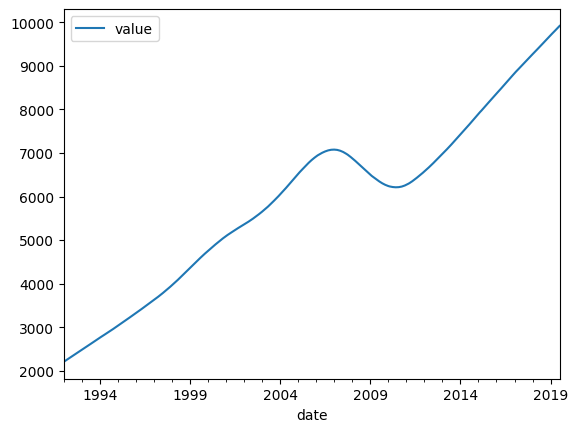

In [15]:
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_plot = pd.DataFrame(lowess(df['furniture_price_adjusted'], 
                                   df.index, 
                                   frac=0.20)[:, 1], #20% of points in the data will determine the smooth at each point.[:,1] at the end slices the output to just take the second column, which contains the smoothed values.
                            index=df.index, columns=['value'])
lowess_plot.plot()

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

**seasonal_decompose(df, model='additive',extrapolate_trend='freq')**

* **seasonal_decompose** - Performs the decomposition into trend, seasonal, and residual components using the parameters specified.

* **model='additive'** - Specifies to use the additive decomposition model. This means the components (trend, seasonal, residual) will be added together to recreate the original data. the amplitude of seasonal fluctuations stays constant regardless of the overall level.

* **model='multiplicative'** - Specifies to use the multiplicative decomposition model. the amplitude of the seasonal fluctuations gets larger as the overall series increases in value.

*Multiplicative is more appropriate if seasonal fluctuations get larger as trend increases
Additive is more appropriate if seasonal fluctuations are constant over time
Plotting both can help determine which assumption fits the data better. *


* **extrapolate_trend='freq'** - Specifies that the trend component should be extrapolated using the frequency of the time series. This makes forecasts of the trend component more accurate.






In [16]:
df.head()   

,furniture_price_adjusted
date,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


In [17]:
df_new

,Month,furniture_price_adjusted,date_str,year,month,day
date,,,,,,
1992-01-01,1992-01-01,2073.432724,1992-01-01,1992,1,1
1992-02-01,1992-02-01,2114.485812,1992-02-01,1992,2,1
1992-03-01,1992-03-01,2260.570891,1992-03-01,1992,3,1
1992-04-01,1992-04-01,2255.103236,1992-04-01,1992,4,1
1992-05-01,1992-05-01,2331.414618,1992-05-01,1992,5,1
...,...,...,...,...,...,...
2019-03-01,2019-03-01,9718.107698,2019-03-01,2019,3,1
2019-04-01,2019-04-01,9248.814254,2019-04-01,2019,4,1
2019-05-01,2019-05-01,10001.305304,2019-05-01,2019,5,1


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

'''extrapolate_trend='freq' 
- Specifies that the trend component should be extrapolated 
using the frequency of the time series. 
This makes forecasts of the trend component more accurate.
'''
# Modelo aditivo:
add = seasonal_decompose(df_new[df_new.columns[1]], model='additive', extrapolate_trend='freq')
# Modelo multiplicativo
mult = seasonal_decompose(df_new[df_new.columns[1]], model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (8,8)})

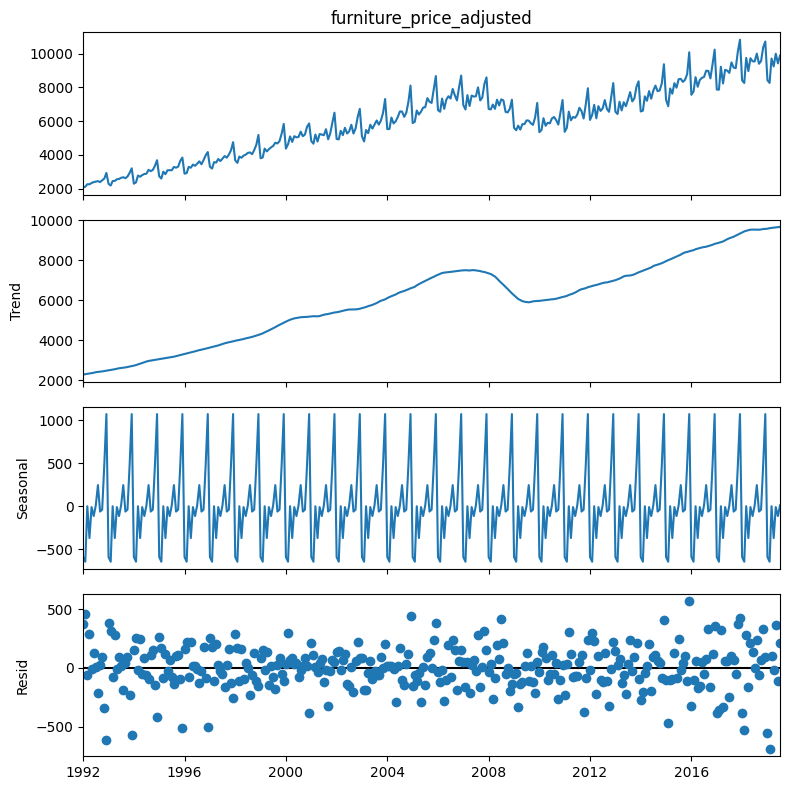

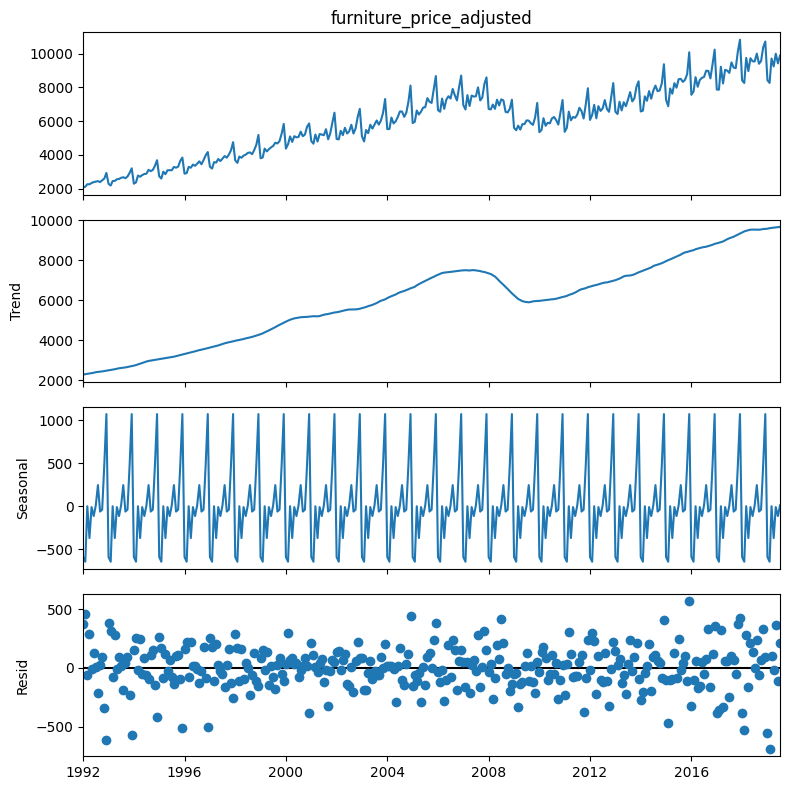

In [19]:
add.plot()

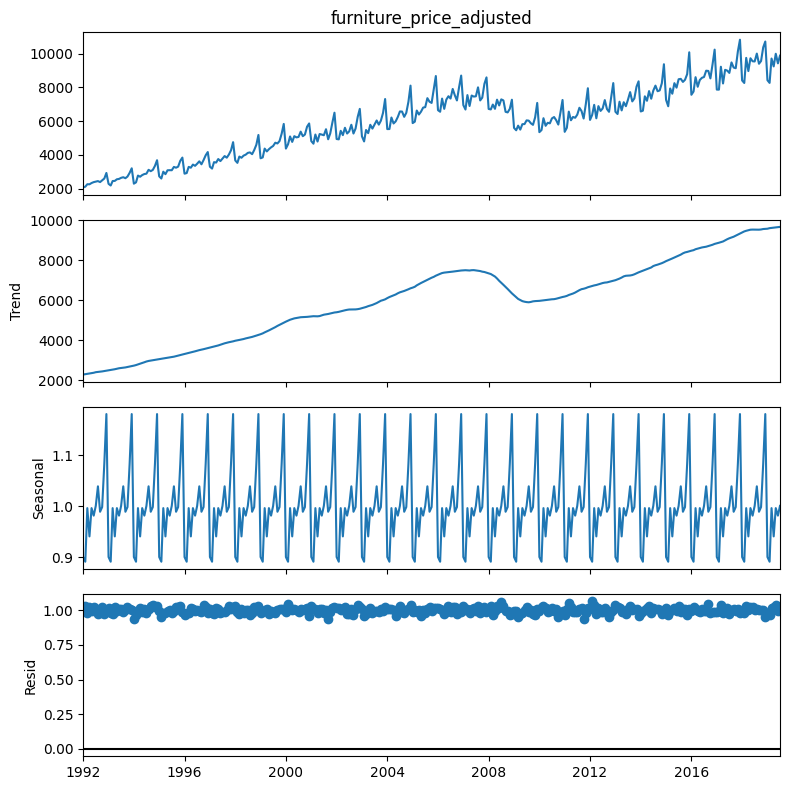

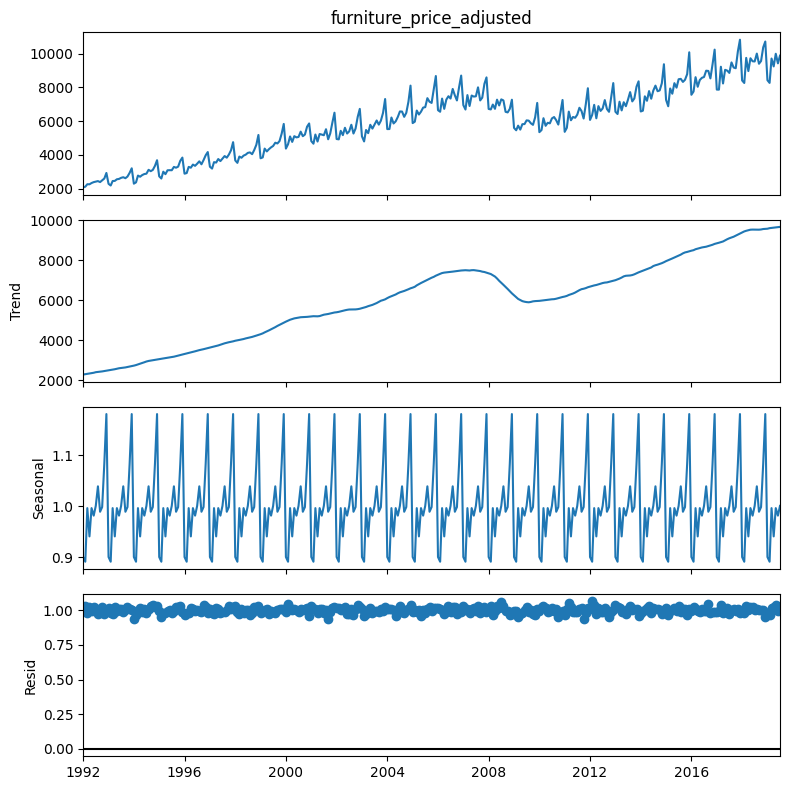

In [20]:
mult.plot()

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

**autocorrelation_plot**

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

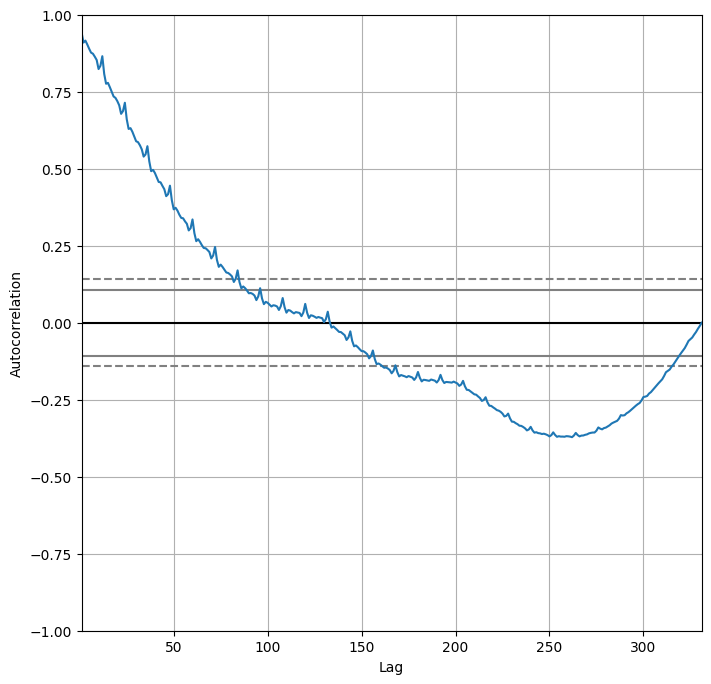

In [21]:
from pandas.plotting import autocorrelation_plot
# Extracting the first column from df, plot autocorrelation
corr_plot = df[df.columns[0]].values
autocorrelation_plot(corr_plot.tolist())

In [22]:
print(corr_plot)

[ 2073.43272395  2114.48581166  2260.57089096  2255.10323586
  2331.41461815  2384.63856715  2417.16537646  2445.49872931
  2387.35170459  2489.35083795  2598.1862969   2928.72568424
  2284.61943856  2183.1379484   2449.19562307  2457.70433438
  2552.87494974  2575.01805505  2639.28076483  2675.4205363
  2617.52218331  2715.93841373  2935.79584714  3205.0148149
  2293.21247184  2370.92297422  2773.78055207  2704.47101627
  2802.46602723  2864.54222149  2885.02933702  3115.40008042
  3034.52984646  3109.51315774  3350.93866748  3684.6299788
  2727.75598159  2597.85447433  3004.81962516  2857.00867814
  3086.64863113  3093.32802417  3089.75605186  3286.47764492
  3240.29653226  3303.07306733  3651.7034209   3840.48118176
  2885.94750957  2922.50459672  3288.31086699  3239.96627121
  3425.30595992  3351.63939866  3476.95785073  3618.69644481
  3442.92925153  3689.2852542   3977.98650068  4169.30133783
  3298.62898724  3187.50161032  3569.63003736  3545.94961762
  3756.23533637  3632.64314

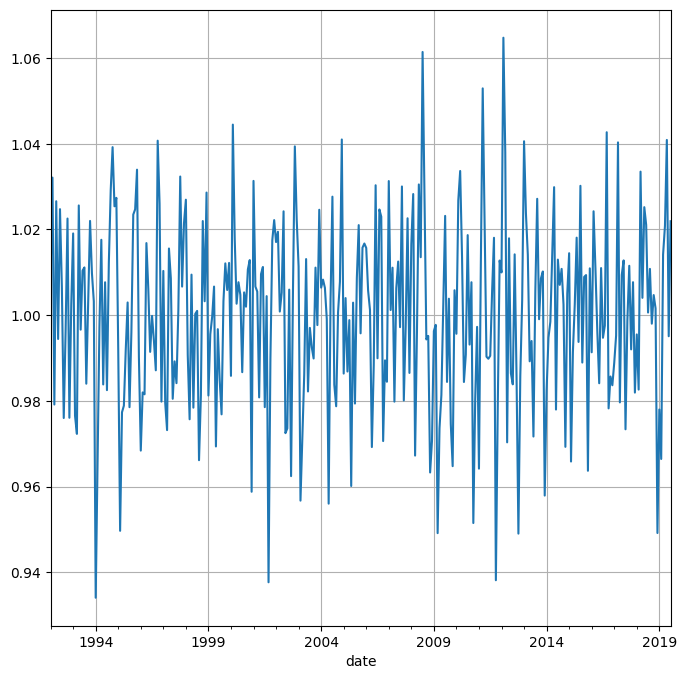

In [23]:
# Detrend and deseasonalize 
# Removing the long-term trend from a time series
detrended = df[df.columns[0]] / mult.trend 
#Modeling the seasonal component and removing it from the series
deseasonalized = detrended / mult.seasonal

# Plot 
deseasonalized.plot()
plt.grid()
plt.show()





## 9. ¿Qué dependencia tiene cada instante de sus últimos 5 lags? Demuéstralo mediante una matriz de correlación.
Lag represents the relationship between a value in a time series with its previous values.

* Lag 1 is the previous time period value (xt-1)
* Lag 2 is two time periods back (xt-2)
* Lag k is the value k time periods back (xt-k)

* Looking at lagged values allows us to analyze the autocorrelation of a time series - how a value is correlated with its own previous values.


In [24]:
# update
df = pd.read_csv("data/df_furniture.csv") 

# 'Month' column to datetime and set it as the index 
# (This allows us to work with the data indexed by time)  
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index(['Month'])

#  lags
df['lag1'] = df['furniture_price_adjusted'].shift(1)
df['lag2'] = df['furniture_price_adjusted'].shift(2)  
df['lag3'] = df['furniture_price_adjusted'].shift(3)
df['lag4'] = df['furniture_price_adjusted'].shift(4)
df['lag5'] = df['furniture_price_adjusted'].shift(5)
df = df.dropna()

# Corr matrix
corr_matrix = df.corr()

print(corr_matrix[['furniture_price_adjusted', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5']])


                          furniture_price_adjusted      lag1      lag2  \
furniture_price_adjusted                  1.000000  0.948959  0.926114   
lag1                                      0.948959  1.000000  0.949044   
lag2                                      0.926114  0.949044  1.000000   
lag3                                      0.943894  0.926023  0.949169   
lag4                                      0.940005  0.944058  0.926191   
lag5                                      0.935901  0.939980  0.944155   

                              lag3      lag4      lag5  
furniture_price_adjusted  0.943894  0.940005  0.935901  
lag1                      0.926023  0.944058  0.939980  
lag2                      0.949169  0.926191  0.944155  
lag3                      1.000000  0.949385  0.926156  
lag4                      0.949385  1.000000  0.949554  
lag5                      0.926156  0.949554  1.000000  


In [25]:
df.corr()

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
furniture_price_adjusted,1.000000,0.948959,0.926114,0.943894,0.940005,0.935901
lag1,0.948959,1.000000,0.949044,0.926023,0.944058,0.939980
lag2,0.926114,0.949044,1.000000,0.949169,0.926191,0.944155
lag3,0.943894,0.926023,0.949169,1.000000,0.949385,0.926156
lag4,0.940005,0.944058,0.926191,0.949385,1.000000,0.949554
lag5,0.935901,0.939980,0.944155,0.926156,0.949554,1.000000


<AxesSubplot: xlabel='Month'>

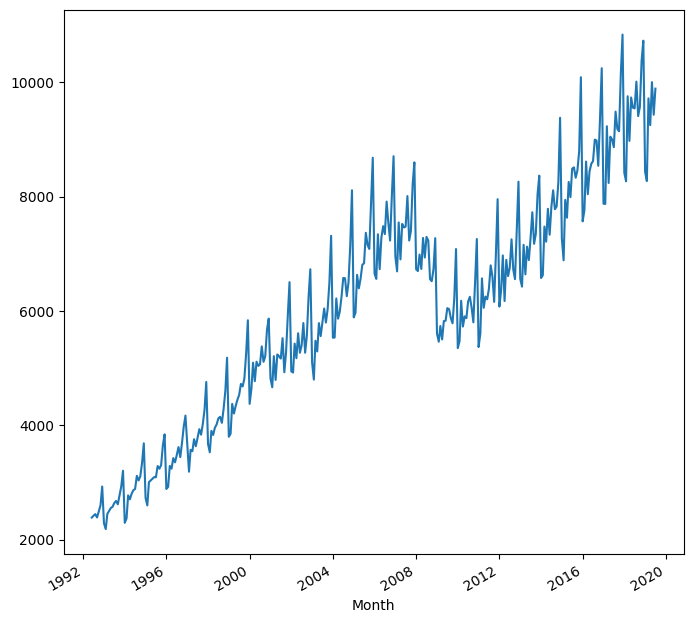

In [26]:
df['furniture_price_adjusted'].plot()

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

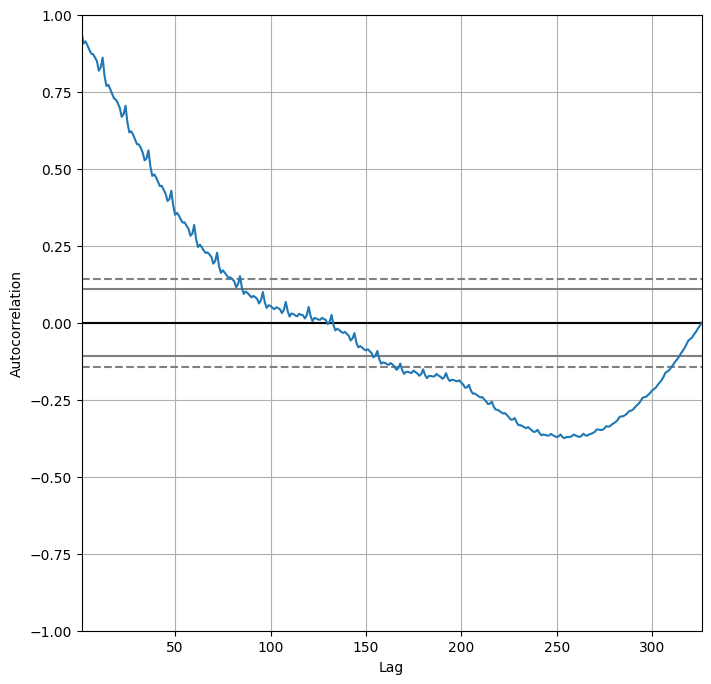

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

autocorrelation_plot(df['furniture_price_adjusted']);


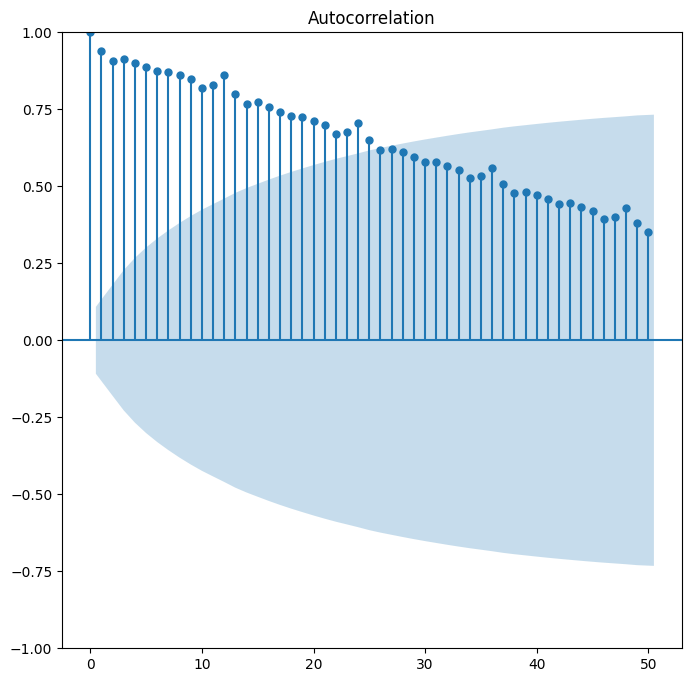

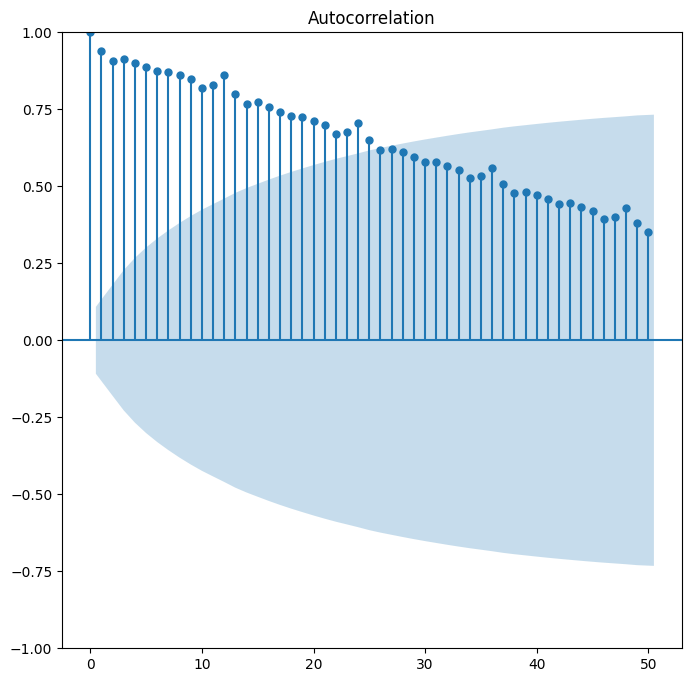

In [28]:
plot_acf(df['furniture_price_adjusted'], lags=50)

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

"detrending" is the standard term used to refer to removing, attenuating or accounting for trends in time series data. The goal is always to isolate the underlying stationary process."
*
* The goal of detrending is to remove any predictable long-term patterns like trends, seasonality, cycles etc. This helps isolate the underlying signal or stationary process.

* It involves transforming the original data to remove the trend component. The resulting detrended data should fluctuate around a mean value without long-term drifts.

* Common detrending techniques include differencing, moving average smoothing, regression against time, decomposition etc. The .diff() method in pandas is one way to difference a series to remove trend.

* Detrending is often done as a data preprocessing step before fitting forecasting models. Many models like ARIMA require the data to be stationary.

* However, detrending can also remove potentially useful information from the data. Over-differencing is a common problem.

* Evaluating the detrended data using plots, autocorrelation, diagnostics can help determine if an appropriate level of detrending has been done.

* For some models, explicitly modeling trends/seasonality may be better than detrending the data.



* diff() provides a simple way to detrend time series data in pandas, by computing differences between consecutive values

<AxesSubplot: xlabel='Month'>

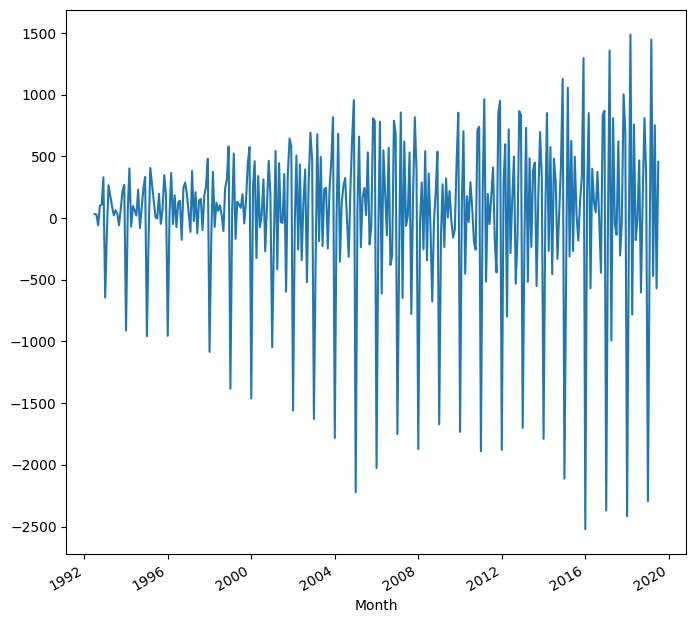

In [29]:
df['furniture_price_adjusted'].diff().dropna().plot()

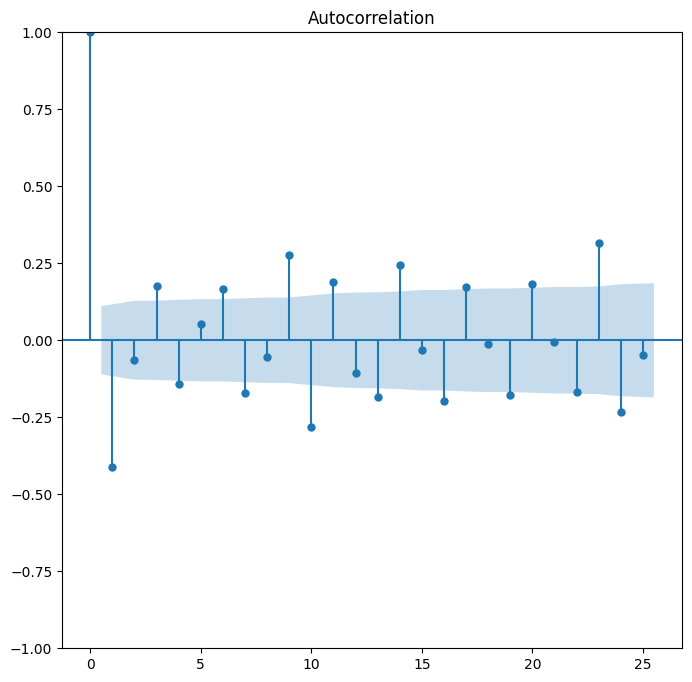

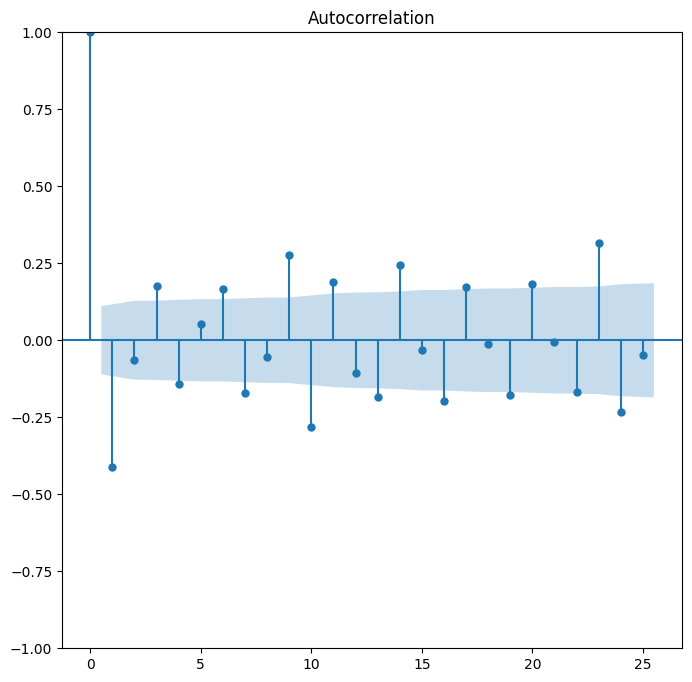

In [30]:
'''diff() takes the first order difference, which removes the overall trend in the series.

diff(12) takes the seasonal difference with a lag of 12 months periods.
 This helps remove any seasonal trends.
'''
plot_acf(df['furniture_price_adjusted'].diff().diff(12).dropna())

In [35]:
df.head()

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
Month,,,,,,
1992-06-01,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724
1992-07-01,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812
1992-08-01,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891
1992-09-01,2387.351705,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236
1992-10-01,2489.350838,2387.351705,2445.498729,2417.165376,2384.638567,2331.414618


In [37]:
# Use lag columns as predictors 
X = df[['lag1','lag2','lag3','lag4','lag5']] 

# Detrend with linear regression
y = df['furniture_price_adjusted']
model = LinearRegression()
model.fit(X, y)

# Predict and detrend
y_pred = model.predict(X)
detrended = df['furniture_price_adjusted'] - y_pred

print("Adjusted prices:", (detrended))




Adjusted prices: Month
1992-06-01     27.930878
1992-07-01     41.363954
1992-08-01     -5.601483
1992-09-01    -94.379970
1992-10-01      7.254642
                 ...    
2019-03-01     -2.860595
2019-04-01   -350.618068
2019-05-01    912.468337
2019-06-01   -208.866682
2019-07-01    908.695517
Name: furniture_price_adjusted, Length: 326, dtype: float64
